In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

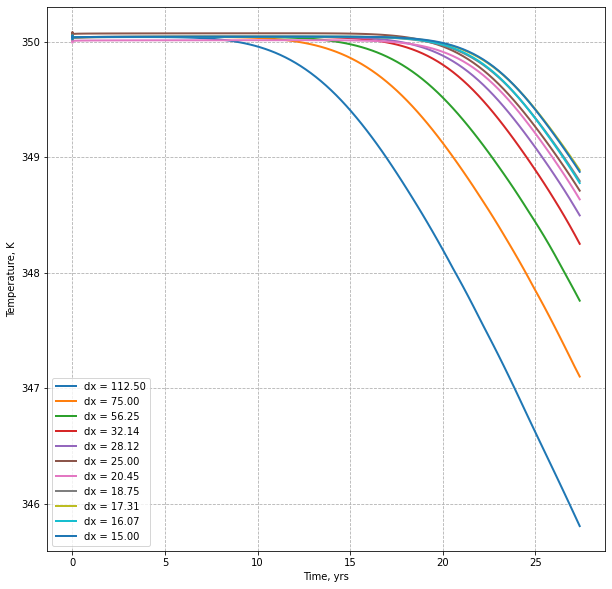

In [3]:
temperature = pd.read_csv('./SerialResolutionHo/temperature_resolution_dx.csv')
time_arr = temperature['time'].to_numpy() / 365
temperature.drop('time', inplace=True, axis=1)

fig, ax = plt.subplots(1, 1,figsize=(10, 10))
axx = fig.axes
labels = []
for col in range(len(temperature.columns)):
    axx[0].plot(time_arr, temperature.iloc[:,col].to_numpy(), linewidth=2)
    labels.append(r'dx = %s' % (temperature.columns[col]))
# axx[0].grid()
axx[0].legend(labels)
axx[0].set_xlabel('Time, yrs')
axx[0].set_ylabel('Temperature, K')
axx[0].grid(visible=True, which='both',axis='both',linestyle='--')

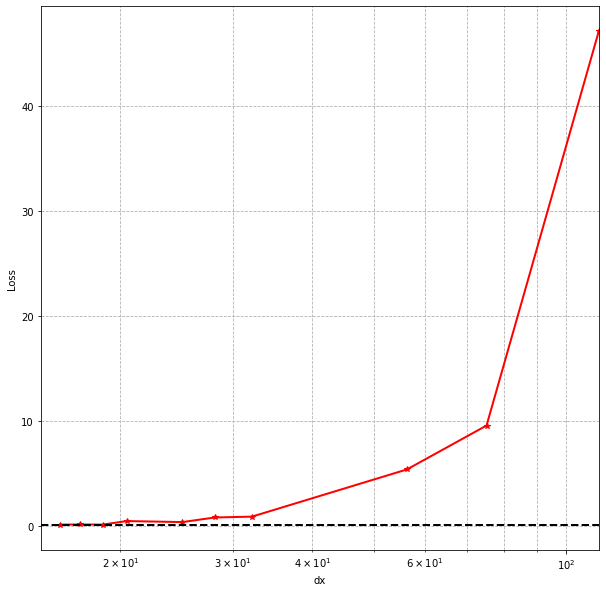

In [4]:
temperature.columns = [float(x) for x in temperature.columns]
temperature = temperature.reindex(sorted(temperature.columns), axis=1)
# empty difference list
differences = []

# dx values
dx = []
for x in temperature.columns:
    dx.append(float(x))

for i in range(1,len(temperature.columns)):
    diff = temperature.iloc[:,i] - temperature.iloc[:,i-1]
    differences.append(sum(diff**2))

fig, ax = plt.subplots(1, 1,figsize=(10, 10))
axx = fig.axes

axx[0].plot(dx[1:], differences, linewidth=2, color='r', marker='*')
axx[0].plot(dx[0:], np.ones(len(differences)+1)*0.05, linewidth=2, color='k', linestyle='--')
axx[0].set_xlabel('dx')
axx[0].set_xscale('log')
axx[0].set_xlim(min(dx), max(dx))
axx[0].set_ylabel('Loss')
axx[0].grid(visible=True, which='both',axis='both',linestyle='--')

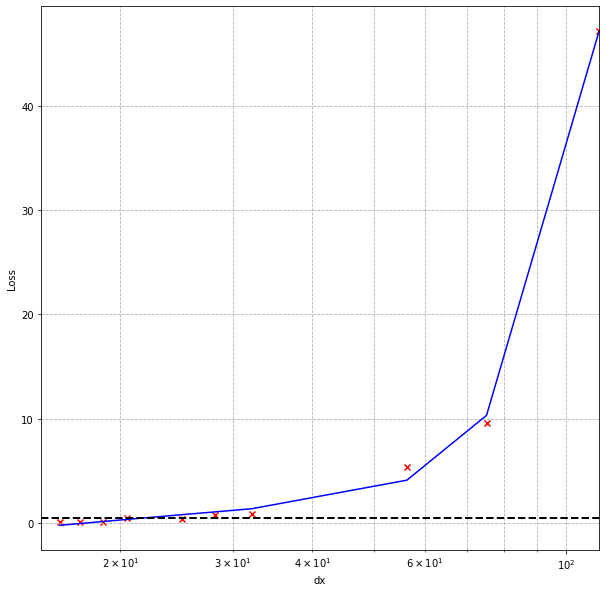

In [8]:
from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    return a * np.array([i**3 for i in x])+ b*np.array([i**2 for i in x]) + c * np.array(x) + d
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
axx = fig.axes
popt, pcov = curve_fit(func, dx[1:], differences)
axx[0].plot(dx[1:], func(dx[1:], *popt), 'b-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
axx[0].scatter(dx[1:], differences, color='r', marker='x')
axx[0].plot(dx[0:], np.ones(len(differences)+1)*0.5, linewidth=2, color='k', linestyle='--')
axx[0].set_xlabel('dx')
axx[0].set_xscale('log')
axx[0].set_xlim(min(dx), max(dx))
axx[0].set_ylabel('Loss')
axx[0].grid(visible=True, which='both',axis='both',linestyle='--')

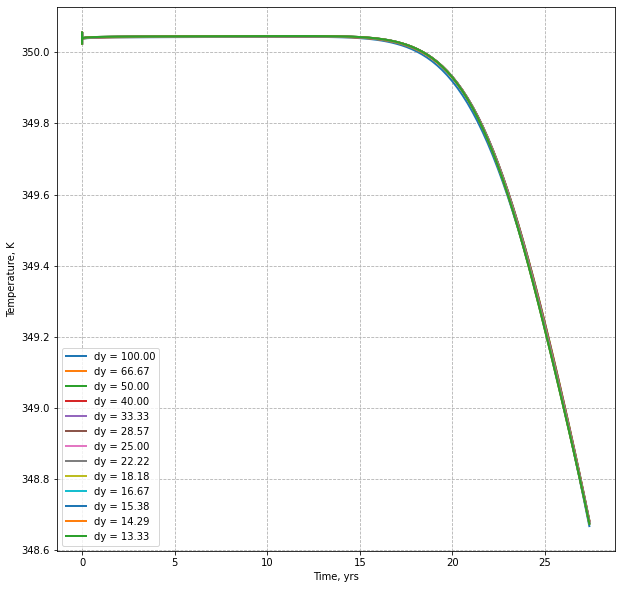

In [9]:
temperature = pd.read_csv('./SerialResolutionHo/temperature_resolution_dy.csv')
time_arr = temperature['time'].to_numpy() / 365
temperature.drop('time', inplace=True, axis=1)

fig, ax = plt.subplots(1, 1,figsize=(10, 10))
axx = fig.axes
labels = []
for col in range(len(temperature.columns)):
    axx[0].plot(time_arr, temperature.iloc[:,col].to_numpy(), linewidth=2)
    labels.append(r'dy = %s' % (temperature.columns[col]))
# axx[0].grid()
axx[0].legend(labels)
axx[0].set_xlabel('Time, yrs')
axx[0].set_ylabel('Temperature, K')
axx[0].grid(visible=True, which='both',axis='both',linestyle='--')

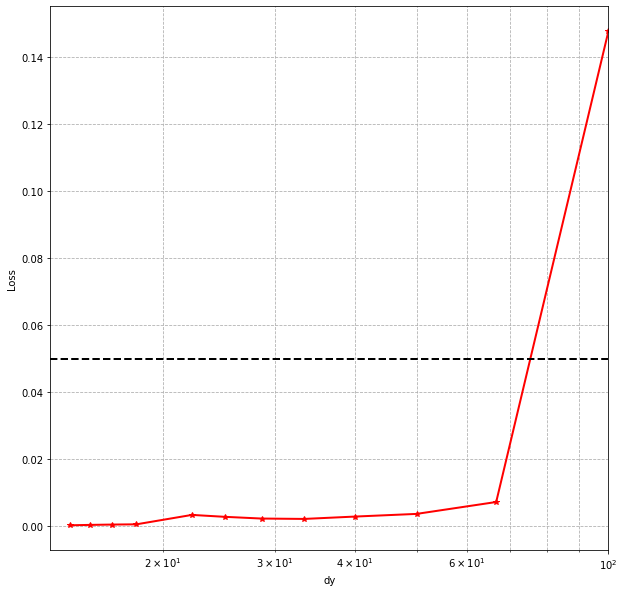

In [10]:
temperature.columns = [float(x) for x in temperature.columns]
temperature = temperature.reindex(sorted(temperature.columns), axis=1)
# empty difference list
differences = []

# dy values
dy = []
for x in temperature.columns:
    dy.append(float(x))

for i in range(1,len(temperature.columns)):
    diff = temperature.iloc[:,i] - temperature.iloc[:,i-1]
    differences.append(sum(diff**2)*30)

fig, ax = plt.subplots(1, 1,figsize=(10, 10))
axx = fig.axes

axx[0].plot(dy[1:], differences, linewidth=2, color='r', marker='*')
axx[0].plot(dy[0:], np.ones(len(differences)+1)*0.05, linewidth=2, color='k', linestyle='--')
axx[0].set_xlabel('dy')
axx[0].set_xscale('log')
axx[0].set_xlim(min(dy), max(dy))
axx[0].set_ylabel('Loss')
axx[0].grid(visible=True, which='both',axis='both',linestyle='--')

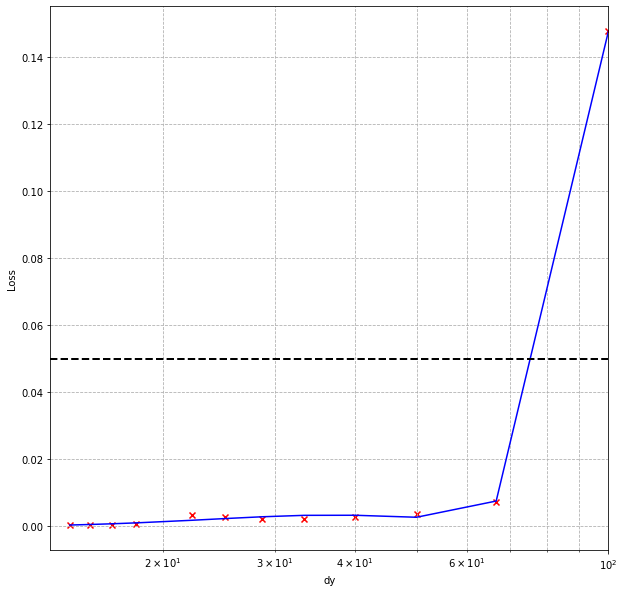

In [11]:
from scipy.optimize import curve_fit
def func(x, a, b, c, d, e):
    return a * np.array([i**4 for i in x])+ b*np.array([i**3 for i in x]) + c * np.array([i**2 for i in x]) + d * np.array(x) + e
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
axx = fig.axes
popt, pcov = curve_fit(func, dy[1:], differences)
axx[0].plot(dy[1:], func(dy[1:], *popt), 'b-')
axx[0].scatter(dy[1:], differences, color='r', marker='x')
axx[0].plot(dy[0:], np.ones(len(differences)+1)*0.05, linewidth=2, color='k', linestyle='--')
axx[0].set_xlabel('dy')
axx[0].set_xscale('log')
axx[0].set_xlim(min(dy), max(dy))
axx[0].set_ylabel('Loss')
axx[0].grid(visible=True, which='both',axis='both',linestyle='--')